# Time series temperature forcasting of Mangaluru city from MODIS satellite data

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [11]:
data=pd.read_csv(r"C:\Users\Sujan H G\Downloads\ee-chart (1).csv")

In [17]:
data=data.drop(columns="2024")

In [27]:
day_num=data["doy"]


In [25]:
data.head()

,doy,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2000
0,1,32.458,31.831,31.334,29.598,32.224,31.067,30.775,32.787,30.361,...,29.475,31.495,31.606,30.369,32.257,31.260,31.685,31.940,31.663,NaN
1,9,31.674,31.166,29.826,32.410,31.862,30.372,32.080,32.905,32.183,...,30.849,29.376,30.944,31.912,31.661,31.037,30.546,30.855,31.002,NaN
2,17,32.421,31.061,29.825,30.763,30.568,33.438,33.806,31.673,32.442,...,30.973,31.521,32.888,31.707,30.852,32.611,31.148,31.230,31.246,NaN
3,25,32.173,30.872,31.833,31.250,32.369,33.323,32.941,30.681,33.210,...,32.484,32.415,32.173,31.773,30.898,31.726,31.994,31.014,32.299,NaN
4,33,34.263,32.228,32.589,32.580,31.877,34.649,32.401,29.710,32.273,...,32.215,30.112,32.392,32.960,30.798,31.870,32.470,30.950,30.337,NaN


In [19]:
data.shape

(46, 25)

# Data Cleaning

In [2]:
data1=pd.read_csv(r"C:\Users\Sujan H G\OneDrive\Desktop\temp data.csv")

In [31]:
data1["day_val"]=day_num

In [3]:
data1=data1.drop(columns=['Unnamed: 25','Unnamed: 26'])

In [19]:
data1.head()

,day,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2000
0,01-Jan,32.458,31.831,31.334,29.598,32.224,31.067,30.775,32.787,30.361,...,29.475,31.495,31.606,30.369,32.257,31.260,31.685,31.940,31.663,31.252783
1,09-Jan,31.674,31.166,29.826,32.410,31.862,30.372,32.080,32.905,32.183,...,30.849,29.376,30.944,31.912,31.661,31.037,30.546,30.855,31.002,31.414652
2,17-Jan,32.421,31.061,29.825,30.763,30.568,33.438,33.806,31.673,32.442,...,30.973,31.521,32.888,31.707,30.852,32.611,31.148,31.230,31.246,31.672783
3,25-Jan,32.173,30.872,31.833,31.250,32.369,33.323,32.941,30.681,33.210,...,32.484,32.415,32.173,31.773,30.898,31.726,31.994,31.014,32.299,31.956783
4,02-Feb,34.263,32.228,32.589,32.580,31.877,34.649,32.401,29.710,32.273,...,32.215,30.112,32.392,32.960,30.798,31.870,32.470,30.950,30.337,32.169217


In [5]:
data1.isnull().sum()

day     0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2000    0
dtype: int64

In [6]:
data1.shape

(46, 25)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     46 non-null     object 
 1   2001    46 non-null     float64
 2   2002    46 non-null     float64
 3   2003    46 non-null     float64
 4   2004    46 non-null     float64
 5   2005    46 non-null     float64
 6   2006    46 non-null     float64
 7   2007    46 non-null     float64
 8   2008    46 non-null     float64
 9   2009    46 non-null     float64
 10  2010    46 non-null     float64
 11  2011    46 non-null     float64
 12  2012    46 non-null     float64
 13  2013    46 non-null     float64
 14  2014    46 non-null     float64
 15  2015    46 non-null     float64
 16  2016    46 non-null     float64
 17  2017    46 non-null     float64
 18  2018    46 non-null     float64
 19  2019    46 non-null     float64
 20  2020    46 non-null     float64
 21  2021    46 non-null     float64
 22  2022

In [67]:

for i in range(len(data1['day'])):
    day.append(data1['day'][i]+'-2023')

In [70]:
day

['01-Jan-2000',
 '09-Jan-2000',
 '17-Jan-2000',
 '25-Jan-2000',
 '02-Feb-2000',
 '10-Feb-2000',
 '18-Feb-2000',
 '26-Feb-2000',
 '05-Mar-2000',
 '13-Mar-2000',
 '21-Mar-2000',
 '29-Mar-2000',
 '05-Apr-2000',
 '13-Apr-2000',
 '21-Apr-2000',
 '29-Apr-2000',
 '07-May-2000',
 '15-May-2000',
 '23-May-2000',
 '31-May-2000',
 '08-Jun-2000',
 '16-Jun-2000',
 '24-Jun-2000',
 '02-Jul-2000',
 '10-Jul-2000',
 '18-Jul-2000',
 '26-Jul-2000',
 '03-Aug-2000',
 '11-Aug-2000',
 '19-Aug-2000',
 '30-Aug-2000',
 '04-Sep-2000',
 '12-Sep-2000',
 '20-Sep-2000',
 '28-Sep-2000',
 '06-Oct-2000',
 '14-Oct-2000',
 '22-Oct-2000',
 '30-Oct-2000',
 '07-Nov-2000',
 '15-Nov-2000',
 '23-Nov-2000',
 '01-Dec-2000',
 '09-Dec-2000',
 '17-Dec-2000',
 '25-Dec-2000',
 '01-Jan-2001',
 '09-Jan-2001',
 '17-Jan-2001',
 '25-Jan-2001',
 '02-Feb-2001',
 '10-Feb-2001',
 '18-Feb-2001',
 '26-Feb-2001',
 '05-Mar-2001',
 '13-Mar-2001',
 '21-Mar-2001',
 '29-Mar-2001',
 '05-Apr-2001',
 '13-Apr-2001',
 '21-Apr-2001',
 '29-Apr-2001',
 '07-May

In [106]:

ls=[]

In [157]:
temp=[]

In [153]:

for i in range(len(data1['2001'])):
    ls.append(data1['2023'][i])

len(ls)

1058

In [158]:
for i in range(len(data1['2000'])):
    temp.append(data1['2000'][i])

In [160]:
for j in range(len(ls)):
    temp.append(ls[j])

In [162]:
len(temp)

1104

In [164]:
data=pd.DataFrame({"date":day,"temperature":temp})
data

,date,temperature
0,01-Jan-2000,31.252783
1,09-Jan-2000,31.414652
2,17-Jan-2000,31.672783
3,25-Jan-2000,31.956783
4,02-Feb-2000,32.169217
...,...,...
1099,23-Nov-2023,30.980000
1100,01-Dec-2023,30.887000
1101,09-Dec-2023,29.470000
1102,17-Dec-2023,30.762000


In [165]:
data.head()

,date,temperature
0,01-Jan-2000,31.252783
1,09-Jan-2000,31.414652
2,17-Jan-2000,31.672783
3,25-Jan-2000,31.956783
4,02-Feb-2000,32.169217


In [166]:
data.shape

(1104, 2)

In [168]:
type(data["date"])

pandas.core.series.Series

In [169]:
data.to_csv("temperature_data.csv")

# time series analysis

In [170]:
data["date"]=pd.to_datetime(data["date"])

In [173]:
data.set_index("date",inplace=True)

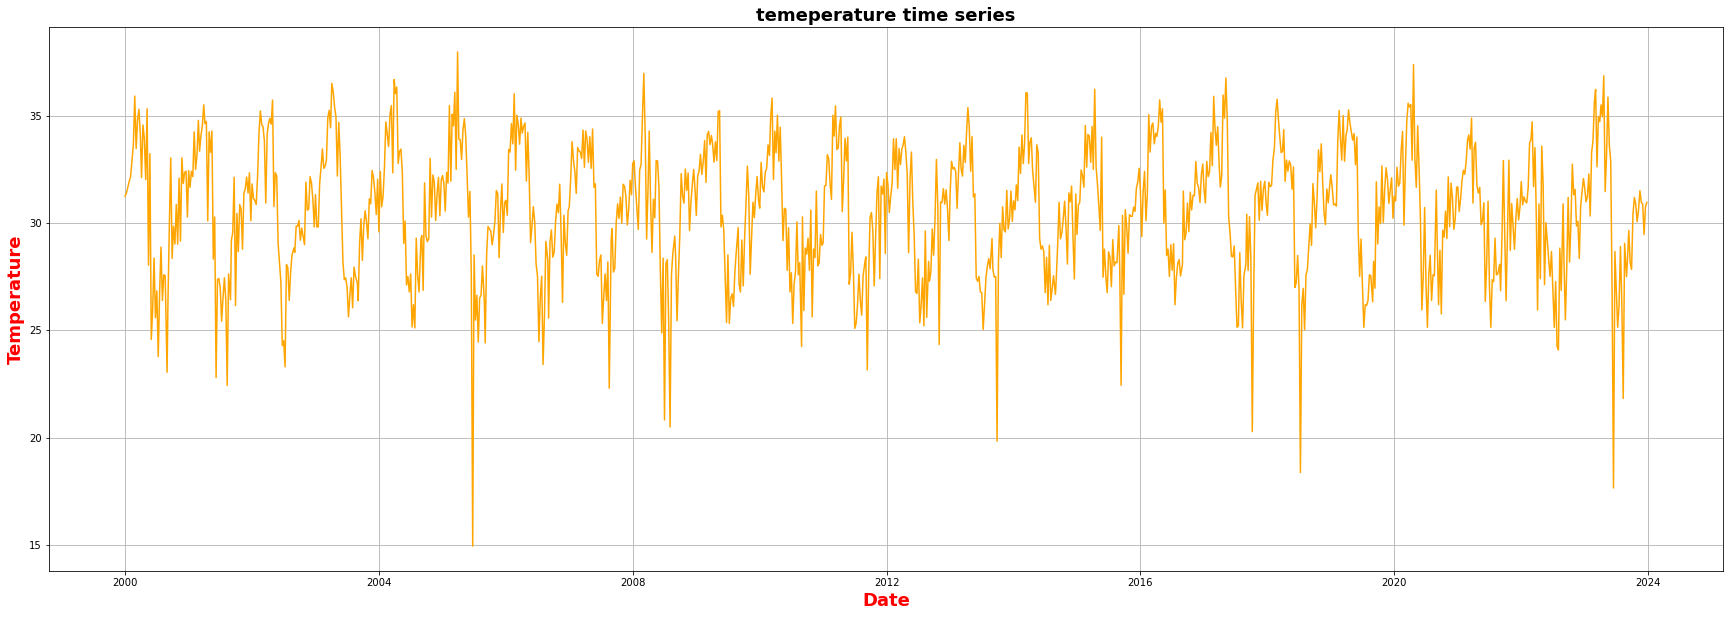

In [203]:
plt.figure(figsize=(30,10))
plt.plot(data.index,data["temperature"],color="orange")
plt.title("temeperature time series",fontsize=18,fontweight='bold')
plt.grid()
plt.xlabel("Date",color="red",fontsize=18,fontweight='bold')
plt.ylabel("Temperature",color="red",fontsize=18,fontweight='bold')
plt.show()

In [207]:
## Preprocesss the data

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [208]:
scaled_data

array([[0.70770757],
       [0.7147292 ],
       [0.72592646],
       ...,
       [0.63037349],
       [0.68641825],
       [0.69561445]])

In [212]:
##split data into training and test

train_size=int(len(scaled_data)*0.8)
train_data,test_data=scaled_data[:train_size],scaled_data[train_size:]

In [214]:
train_data.shape,test_data.shape

((883, 1), (221, 1))

In [215]:
#Function to create dataset for LSTM

def create_dateset(dataset,time_step=1):
    x,y=[],[]
    for i in range(len(dataset)-time_step):
        x.append(dataset[i:(i+time_step),0])
        y.append(dataset[i+time_step,0])
    return np.array(x),np.array(y)
    

In [363]:
time_step=100
x_train,y_train=create_dateset(train_data,time_step)
x_test,y_test=create_dateset(test_data,time_step)

In [364]:
len(x_train),len(y_train),len(x_test),len(y_test)

(783, 783, 121, 121)

In [365]:
x_train.shape

(783, 100)

In [366]:
##Reshape data for LSTM

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [367]:
x_test.shape,x_train.shape

((121, 100, 1), (783, 100, 1))

In [368]:
#Build LSTM model

model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss='mean_squared_error')

In [369]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
25/25 [==============================] - 7s 94ms/step - loss: 0.2019
Epoch 2/100
25/25 [==============================] - 2s 93ms/step - loss: 0.0213
Epoch 3/100
25/25 [==============================] - 2s 92ms/step - loss: 0.0160
Epoch 4/100
25/25 [==============================] - 2s 93ms/step - loss: 0.0146
Epoch 5/100
25/25 [==============================] - 2s 87ms/step - loss: 0.0141
Epoch 6/100
25/25 [==============================] - 2s 80ms/step - loss: 0.0127
Epoch 7/100
25/25 [==============================] - 2s 87ms/step - loss: 0.0114
Epoch 8/100
25/25 [==============================] - 2s 90ms/step - loss: 0.0100
Epoch 9/100
25/25 [==============================] - 2s 81ms/step - loss: 0.0087
Epoch 10/100
25/25 [==============================] - 2s 82ms/step - loss: 0.0080
Epoch 11/100
25/25 [==============================] - 2s 81ms/step - loss: 0.0072
Epoch 12/100
25/25 [==============================] - 2s 92ms/step - loss: 0.0072
Epoch 13/100
25/25 [=====

In [370]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


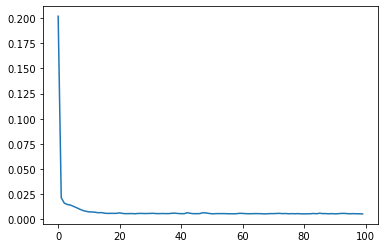

In [374]:
#Loss 

loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [375]:
# Prediction

train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

4/4 [==============================] - 0s 35ms/step


In [376]:
#Inverse transform to get original scale
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

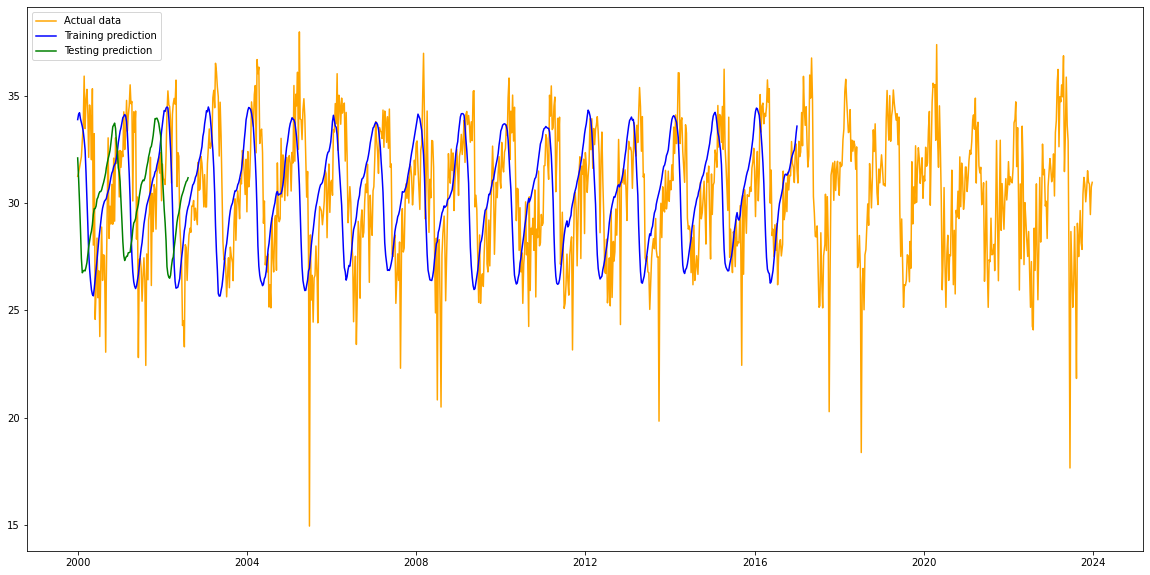

In [377]:
plt.figure(figsize=(20,10))
plt.plot(data.index,data["temperature"],color="orange",label="Actual data")
plt.plot(data.index[:len(train_predict)],train_predict,label="Training prediction",color="blue")
plt.plot(data.index[:len(test_predict)],test_predict,label="Testing prediction",color="green")
plt.legend()
plt.show()

In [378]:
#Predict the temperature for next 200 days
future_steps=200
x_input=scaled_data[-time_step:].reshape((1,time_step,1))
forcast=[]

In [379]:
for _ in range(future_steps):
    temp_pred=model.predict(x_input,verbose=0)
    forcast.append(temp_pred[0,0])
    x_input=np.append(x_input,temp_pred.reshape(1,1,1),axis=1)
    x_input=x_input[:,1:,:]

In [380]:
#inverse transform the forcast
forcast=scaler.inverse_transform(np.array(forcast).reshape(-1,1))

In [381]:
len(forcast)

200

In [382]:
#generate dates for forcast
last_date=data.index[-1]
forcast_dates=pd.date_range(start=last_date,periods=future_steps+1)[1:]

In [383]:
len(forcast_dates)

200

In [335]:
forcast_dates.shape,forcast.shape

((200,), (200, 1))

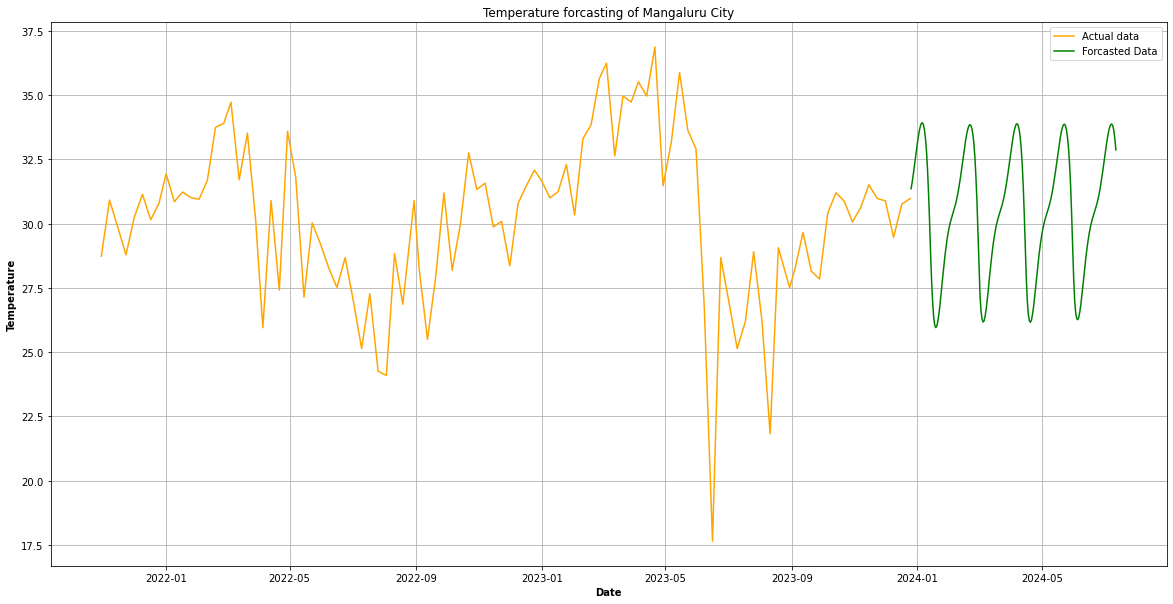

In [390]:

date=data.index[-100:]
temp=data["temperature"][-100:]

plt.figure(figsize=(20,10))
plt.title("Temperature forcasting of Mangaluru City")
plt.grid()
plt.xlabel("Date",fontweight='bold')
plt.ylabel("Temperature",fontweight='bold')
plt.plot(date,temp,color="orange",label="Actual data")
plt.plot(forcast_dates,forcast,color="g",label="Forcasted Data")
plt.legend()
plt.show()